<a href="https://colab.research.google.com/github/toheedakhtar/pytorch-deeplearning/blob/main/notebooks/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch computer vision

## 0. Computer vision libraries in pytorch

* `torchvision` - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transformers` - function for manipulating vision data to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset for Pytorch.
* `torch.utils.data.DataLoaders` - Creates a Python iterable over a dataset

In [4]:
#torch
import torch
from torch import nn

#torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from `torchvision.datasets`

In [5]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=True, # training true , test false
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=False, # training true , test false
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11612688.60it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211428.33it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1343349.02it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5430653.17it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [58]:
len(train_data), len(test_data)

(60000, 10000)

In [59]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [15]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [61]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [62]:
# check shapes
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing our data


Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

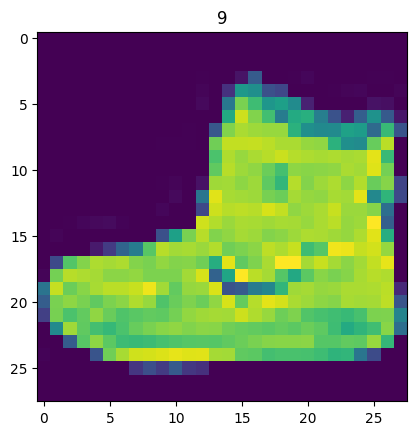

In [63]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze()) # getting rid of 1 color channel. grayscale
plt.title(label)
# image

(-0.5, 27.5, 27.5, -0.5)

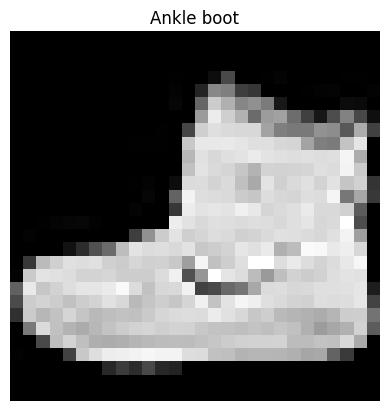

In [64]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

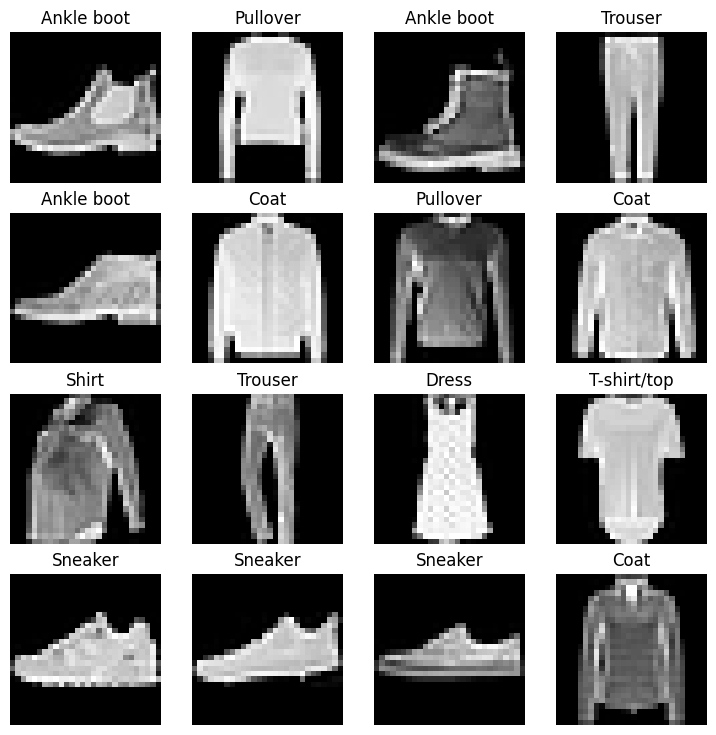

In [65]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

can we do model these with linear lines or we'll need non-linearity?

## Prepare DataLoader

Rght now, our data is in the form of PyTorch Datasets  
DataLoader turns our data into a Python Iterable.  
More specifically, we want to turn our data into batches or mini-batches.  
But Why?  
1. It is more computatinally efficient. can't store a lot of images in memory at same time so we use batches/mini-batches.
2. It gives our neural network more chances ot update its gradients per epoch.


In [66]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
from torch.utils.data import DataLoader

#hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data, batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data, batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a439394afb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a439394a710>)

In [7]:
len(train_dataloader) , len(test_dataloader)

(1875, 313)

In [69]:
# checking what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [70]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size:  torch.Size([1, 28, 28])


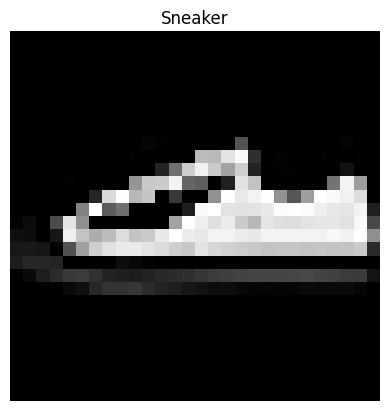

In [71]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print("image size: ", img.shape)

## 3. Model 0 : Build a baseline Model

when starting to build a machine learning modelling experiments,  
its best practice to start with baseline model  

A baseline model is a simple model you will try and improve upon with subsequent mods  

in other words : start simply and add complexity when necessary.

In [72]:
# Create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x)

# print output
x.shape , output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [71]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int , hidden_units : int,output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
  )

  def forward(self, x):
    return self.layer_stack(x)


In [72]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [75]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

### 3.1 setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multiclass data, our loss function we'll be `nn.CrossEntropyLoss()`
* Optimizer - `nn.optim.SGD()`
* Evaluation metric - accuracy as we are doing classification

In [73]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = ((correct) / len(y_pred)) * 100
  return acc

In [74]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

two main things to track in ml expeiments are :
1. Model's performance (loss and accuracy)
2. How fast it runs

In [75]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device : torch.device = None):
  total_time = end - start
  print(f"Train time on {device} : {total_time:.3f} sec")
  return total_time

In [79]:
start_time = timer()
end_time=timer()
print_train_time(start_time, end_time )

Train time on None : 0.000 sec


6.430300027204794e-05

### 3.3 Creating a training loop and training model on batches of data

1. Loop through epochs.
2. loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening
5. time it all

In [76]:
# import tqdm for progress
from tqdm.auto import tqdm
# set seed
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# set num of epochs
epochs = 3

# create training and test loops
for epoch in tqdm(range(epochs)):
  print(f"epoch : {epoch}\n----")

  # training
  train_loss = 0

  # add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader): # X - features , y - labels
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)

    #2. calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss  # accumulate train loss

    # optimize zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    # print what's happeing
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)/len(train_dataloader.dataset)} samples.")

  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Tesitng
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. forward pass
      test_pred = model_0(X_test)

      #2. calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. calc accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calc test loss avg per batch

    test_loss /= len(test_dataloader)

    # calc test acc / batch
    test_acc /= len(test_dataloader)

  # print out what happening
  print(f"\n Train loss : {train_loss:.4f} | test_loss : {test_loss:.4f} | Test_acc : {test_acc:.4f}%")

# calc train time
train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0
----
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

 Train loss : 0.5904 | test_loss : 0.5095 | Test_acc : 82.0387%
epoch : 1
----
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

 Train loss : 0.4763 | test_loss : 0.4799 | Test_acc : 83.1969%
epoch : 2
----
Looked at 0.0 samples.
Looked at 0.21333333333333335 samples.
Looked at 0.4266666666666667 samples.
Looked at 0.64 samples.
Looked at 0.8533333333333334 samples.

 Train loss : 0.4550 | test_loss : 0.4766 | Test_acc : 83.4265%
Train time on cpu : 37.983 sec


In [77]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [78]:
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn, device:torch.device = device):

  loss , acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc valuers per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # avg loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model_name" : model.__class__.__name__, # only works if model was created with class
      "model_loss" : loss.item(),
      "model_acc" : acc
  }




In [79]:
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn,
    device='cpu'
)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code

In [82]:
import torch

In [83]:
!nvidia-smi

Sun Oct 13 12:59:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0              29W /  70W |    159MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [84]:
torch.cuda.is_available()

True

In [85]:
# setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6.1 Building a model with non-linear functions

we learned the power of non-linearity in notebook 02.

In [87]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_units:int,
              output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x : torch.Tensor):
    return self.layer_stack(x)

In [88]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [89]:
# loss func and optimizer
loss_fn = nn.CrossEntropyLoss() # measures how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) # update our model parameters to min loss

### 6.2 Functionizing training and evaluation / testing loops

let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [90]:
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn, device: torch.device = device
               ):

  train_loss, train_acc = 0, 0

  # add a loop to loop through training batches
  for batch, (X, y) in enumerate(data_loader): # X - features , y - labels
    model.train()
    # put data on target device
    X,y = X.to(device), y.to(device)
    # 1. forward pass
    y_pred = model(X)
    #2. calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss  # accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    # optimize zero grad
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    # optimizer step
    optimizer.step()

  # divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss : {train_loss:.3f} | Train acc : {train_acc:.2f}%\n")

In [91]:
def test_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn, device: torch.device = device):

  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      #1. forward pass
      test_pred = model(X_test)
      #2. calculate loss
      test_loss += loss_fn(test_pred, y_test)
      # 3. calc accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calc test loss avg per batch
    test_loss /= len(data_loader)
    # calc test acc / batch
    test_acc /= len(data_loader)

  # print out what happening
  print(f"test_loss : {test_loss:.3f} | Test_acc : {test_acc:.2f}%\n")



In [92]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_gpu = timer()
epochs = 3

# create optimzation and evaluation loop using train and test functions

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} ------\n")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_stop_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_gpu,
                                            end = train_time_stop_gpu,
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 ------

Train loss : 1.092 | Train acc : 61.34%

test_loss : 0.956 | Test_acc : 65.00%

Epoch: 1 ------

Train loss : 0.781 | Train acc : 71.93%

test_loss : 0.722 | Test_acc : 73.91%

Epoch: 2 ------

Train loss : 0.670 | Train acc : 75.94%

test_loss : 0.685 | Test_acc : 75.02%

Train time on cpu : 33.826 sec


In [93]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [94]:
total_train_time_on_cpu

37.98305037299997

In [95]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

> **Note:** Sometimes you might find that your model trains faster on CPU than GPU.
> why is this?
> 1. It could be that the overhead for copying data/model to and from GPU outweights the compute benefits offered by the GPU.
> 2. the hardware you're using has a better cpu in terms of compute and capability than GPU

## Model 2 : Building a Convolutional Neural Network

CNN's are also knowns as ConvNets  
CNN's are known for their capabilities to find patterns in visual data

In [54]:
# create a convNet
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TInyVGG
  model from the CNN explainer website.
  """

  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()

    self.conv_block_1 =  nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1), # hyperparmeters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 =  nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1), # hyperparmeters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print("shape of conv1" , x.shape)
    x = self.conv_block_2(x)
    # print("shape of conv2" ,x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [55]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10,
                              output_shape=len(class_names)).to(device)
# model_2

In [56]:
# pass img through model
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [57]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [58]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [59]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3), stride=1, padding=0)

# pass the data through conv lauer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [60]:
test_image.shape

torch.Size([3, 64, 64])

In [61]:
# create sample nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# pass data through it
test_image_through_conv = conv_layer(test_image)
test_image_through_conv.shape

# pass data through maxpool2d
test_image_through_conv_max_pool = max_pool_layer(test_image_through_conv)
test_image_through_conv_max_pool.shape

torch.Size([10, 31, 31])

In [62]:
# plt.imshow(image.squeeze(), cmap='gray')

### 7.3 Setup a loss function and optimizer for `model_2`

In [63]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 training and testing our `model_2` using train and test functions

In [64]:
from tqdm.auto import tqdm


In [65]:
## training and testing  --> GPU

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_timer_start_model2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"epoch : {epoch} ------>\n")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)

  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)

train_timer_stop_model2 = timer()
total_time_model2 = print_train_time(start=train_timer_start_model2, end=train_timer_stop_model2, device=device)
total_time_model2

  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0 ------>

Train loss : 0.595 | Train acc : 78.38%

test_loss : 0.395 | Test_acc : 85.99%

epoch : 1 ------>

Train loss : 0.365 | Train acc : 86.90%

test_loss : 0.352 | Test_acc : 86.91%

epoch : 2 ------>

Train loss : 0.326 | Train acc : 88.13%

test_loss : 0.327 | Test_acc : 88.07%

Train time on cpu : 171.052 sec


171.05248163199997

> **Note**  
> GPU total training time : 44.9 sec

In [66]:
# GET model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [96]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time

In [98]:
import pandas as pd

In [99]:
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


> **Note**  
> On GPU `FashionMNISTModelV2` -> total training time was ~ 44.9

In [103]:
compare_results["training_time"] = [total_train_time_on_cpu, total_train_time_model_1, total_time_model2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,37.983050
1,FashionMNISTModelV1,0.685001,75.019968,33.825868
2,FashionMNISTModelV2,0.327190,88.069089,171.052482


Text(0, 0.5, 'model')

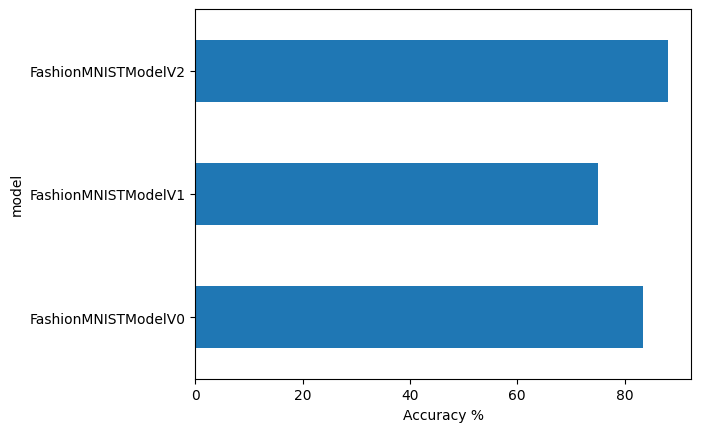

In [108]:
# visualzie
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel('Accuracy %')
plt.ylabel("model")

## 9. Make and evaluate random prediciton with best model

In [110]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [121]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

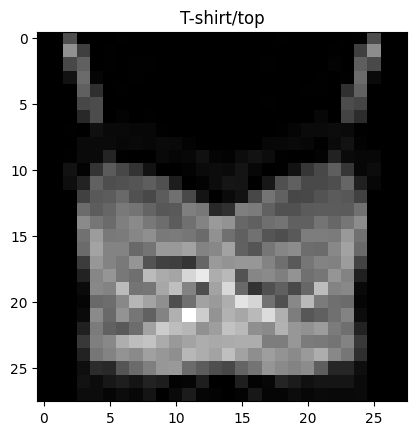

In [112]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [122]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[7.0635e-02, 6.5179e-03, 1.1310e-01, 2.7208e-02, 2.8958e-02, 4.9839e-05,
         7.4314e-01, 5.4755e-06, 1.0230e-02, 1.5318e-04],
        [7.9140e-07, 1.7993e-07, 3.4035e-06, 1.2404e-06, 2.5167e-06, 9.9968e-01,
         9.6480e-07, 2.2469e-05, 2.8441e-04, 2.0893e-07]])

In [123]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([6, 5, 8, 7, 9, 9, 5, 6, 2])

In [124]:
test_labels

[6, 5, 8, 7, 9, 9, 5, 6, 2]

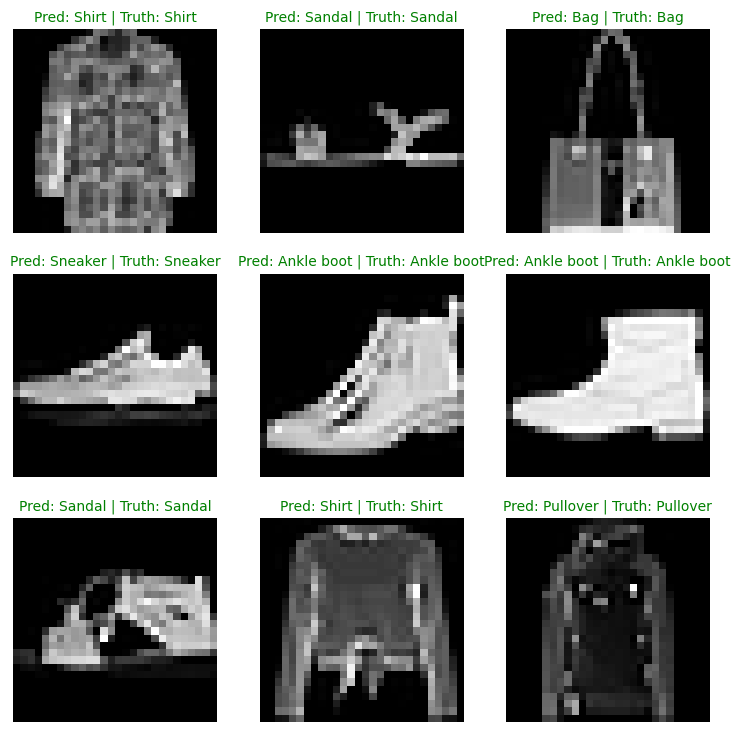

In [125]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

confusion matrix is a fantastic way of evaluating classification models visually

In [126]:

# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [129]:
len(y_pred_tensor)

10000

In [151]:
import mlxtend
print(mlxtend.__version__)


0.23.1


In [134]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [131]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [132]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

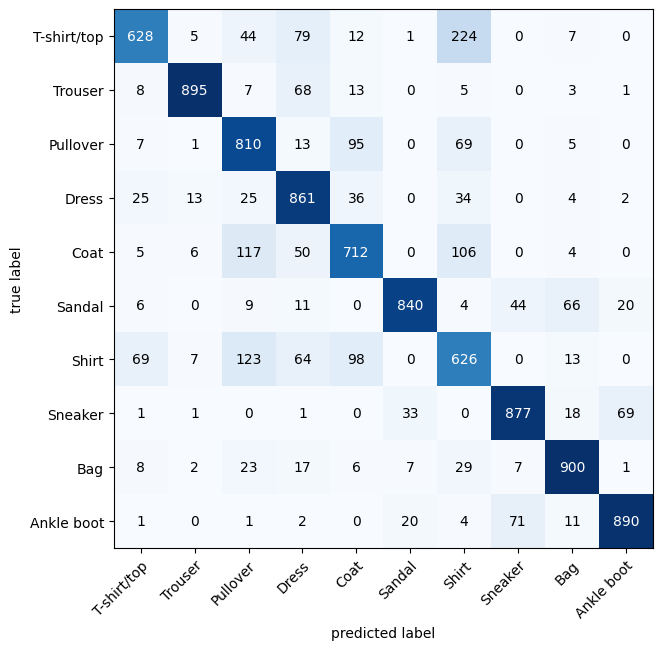

In [154]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="MULTICLASS")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and load our best model

In [160]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03-pytorch-computer-vsision-2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# MODEL_SAVE_PATH

print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

saving model to : models/03-pytorch-computer-vsision-2.pth


In [161]:
# create new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

<ipython-input-161-fac4c4df7772>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [162]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [164]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [165]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']))

tensor(True)